# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Yasir Amri
- **Email:** yasiramrr@hotmail.com
- **ID Dicoding:** yasiramrr

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda sepanjang tahun, apakah tahun 2011 atau 2012 yang lebih dominan?
- Pertanyaan 2: Apakah terdapat dampak musim terhadap jumlah penyewa sepeda, baik dari kalangan Casual maupun Registered?
- Pertanyaan 3: Apakah cuaca memiliki dampak terhadap jumlah pengguna sepeda?
- Pertanyaan 4: Bagaimana kondisi ketika sepeda digunakan pada workingday, holiday, dan weekday?
- Pertanyaan 5: Bagaimana variabel seperti temp dan atemp serta humidity bisa berpengaruh terhadap jumlah total pengguna sepeda Casual ataupun Registered)

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

## Load Tabel Day

In [4]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Load Tabel Hour

In [5]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Assessing Data

## Menilai Data day_df

a. melihat tipe data day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari sini dapat kita lihat, dteday perlu diperbaiki tipe datanya karena tidak sesuai yaitu dari tipe data object menjadi tipe data datetime

b. Mencari missing values pada data day_df

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

day_df tidak memiliki missing values

c. mencari duplikasi data pada data day_df

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi data

d. Memeriksa nilai statistik pada data day_df

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak terdapat keanehan pada nilai statistik pada data day_df

## Menilai Data hour_df

a. melihat tipe data hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari sini dapat kita lihat, dteday perlu diperbaiki tipe datanya karena tidak sesuai yaitu dari tipe data object menjadi tipe data datetime

b. mencari missing value pada data hour_df

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing values

c. mencari duplikasi data hour_df

In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi data pada hour_df

d. Memeriksa nilai statistik pada data hour_df

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak terdapat keanehan pada nilai statistik pada data hour_df

### Cleaning Data

sebelum melanjutkan cleaning data karena tabel day dan hour hanya berbeda pada kolomnya saja, saya akan menghapus tabel hour alasannya adalah tabel tersebut tidak akan diperlukan untuk keperluan analisis bisnis karena tidak relevan dengan pertanyaan yang telah saya tetapkan sebelumnya.

In [14]:
del hour_df

a. menghapus kolom yang tidak diperlukan, kolom tersebut adalah:
* instan karena hanya menampilkan nomor urut saja
* windspeed karena tidak ada pertanyaan bisnis yang berkaitan dengan kecepatan angin

In [15]:
drop_col=['instant', 'windspeed']
for i in day_df.columns:
    if i in drop_col:
        day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


b. Mengubah nama judul kolom

In [16]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


c. mengubah angka menjadi nama bulan

In [17]:
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

d. Mengganti angka menjadi keterangan pada season

In [18]:
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

e. Mengganti angka menjadi keterangan pada weekday

In [19]:
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

f. Mengganti angka menjadi keterangan pada weather_cond

In [20]:
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [21]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


g. Mengubah tipe data

In [22]:
# mengubah tipe data object ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# mengubah tipe data integer ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

In [23]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## Exploratory Data Analysis (EDA)

### Explore Data day_df

a. mengelompokkan penyewa sepeda berdasarkan keadaan cuaca

In [24]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

/var/folders/kf/f5xw1c7123j0hx9pvnskytlc0000gn/T/ipykernel_2909/2311190310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil di atas, terlihat bahwa penyewa sepeda lebih condong untuk menyewa saat cuaca sedang cerah atau mendung. Permintaan menjadi sangat rendah saat salju turun dan tidak ada permintaan sama sekali saat cuaca sangat buruk.

b. mengelompokkan penyewa sepeda berdasarkan bulan

In [25]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

/var/folders/kf/f5xw1c7123j0hx9pvnskytlc0000gn/T/ipykernel_2909/2974312987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
Mei    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan data di atas, kesimpulannya adalah bulan Juni memiliki rata-rata tertinggi dan jumlah penyewaan terbanyak, sementara bulan Januari memiliki rata-rata terendah dan jumlah penyewaan terkecil.

c.  membandingkan penyewa sepeda saat weekday dengan weekend

In [26]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

/var/folders/kf/f5xw1c7123j0hx9pvnskytlc0000gn/T/ipykernel_2909/2870456447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Berdasarkan data di atas, urutan rata-rata jumlah penyewa dari yang terbesar ke yang terkecil adalah sebagai berikut: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

d. mengelompokkan penyewa sepeda berdasarkan holiday

In [27]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

/var/folders/kf/f5xw1c7123j0hx9pvnskytlc0000gn/T/ipykernel_2909/1497150874.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435


Berdasarkan data di atas, dapat disimpulkan bahwa kecenderungan penyewa sepeda adalah menyewa pada hari-hari biasa bukan pada hari-hari libur.

e. Mengelompokkan penyewa sepeda berdasrkan workingday

In [28]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

/var/folders/kf/f5xw1c7123j0hx9pvnskytlc0000gn/T/ipykernel_2909/3484920239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Berdasarkan data di atas, terlihat bahwa jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur, meskipun perbedaannya tidak begitu signifikan.

f. Mengelompokkan penyewa sepeda berdasarkan season

In [29]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

/var/folders/kf/f5xw1c7123j0hx9pvnskytlc0000gn/T/ipykernel_2909/3641718347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan analisis di atas, terlihat bahwa baik penyewa Casual maupun Registered cenderung lebih menyukai musim gugur (Fall) berdasarkan rata-rata penyewaan. Sebaliknya, penyewaan paling sedikit terjadi pada musim semi (Spring) dengan rata-rata yang terendah.

g. Mengelompokkan temp, hum, dan humidity berdasarkan season

In [30]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

/var/folders/kf/f5xw1c7123j0hx9pvnskytlc0000gn/T/ipykernel_2909/3725487608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Berdasarkan hasil analisis di atas, beberapa kesimpulan dapat diambil:
* Musim gugur (fall) memiliki rata-rata temperatur dan "atemp" (temperatur yang dirasakan) tertinggi, diikuti oleh musim panas (summer), musim dingin (winter), dan musim semi (spring).
* Musim dingin (winter) memiliki rata-rata kelembaban udara (humidity) tertinggi, diikuti oleh musim gugur (fall), musim panas (summer), dan musim semi (spring).

h. hubungan casual, registeredm dan count

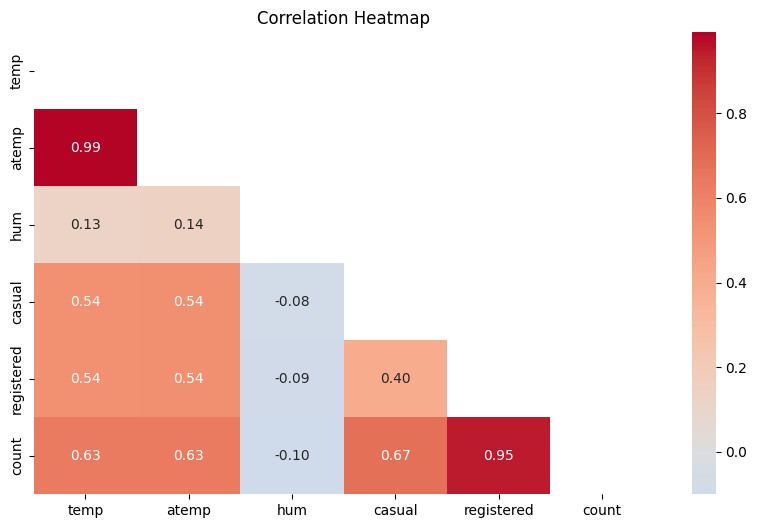

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis di atas, dapat disimpulkan sebagai berikut:
* Temp dan atemp memiliki korelasi yang sangat tinggi (0.99).
* Hum memiliki korelasi yang lemah dengan temp dan atemp (0.13 dan 0.14).
* Jumlah penyewa Casual memiliki korelasi yang cukup signifikan dengan temp dan atemp (0.54), serta memiliki korelasi sedikit negatif dengan hum (-0.08).
* Jumlah penyewa Registered menunjukkan pola yang serupa dengan penyewa Casual, dan memiliki korelasi yang moderat dengan penyewa Casual (0.40).
* Jumlah total penyewaan memiliki korelasi yang kuat dengan temp, atemp, penyewa Casual, dan penyewa Registered (0.63, 0.63, 0.67, dan 0.95), dan memiliki korelasi yang sedikit negatif dengan hum (-0.10).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda sepanjang tahun, apakah tahun 2011 atau 2012 yang lebih dominan?

/var/folders/kf/f5xw1c7123j0hx9pvnskytlc0000gn/T/ipykernel_2909/340213885.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({


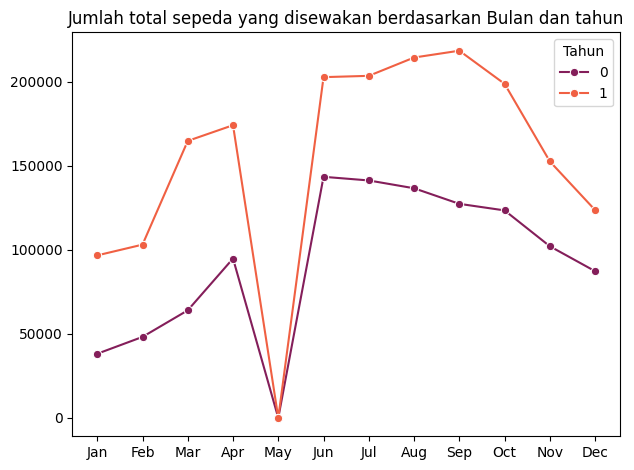

In [32]:

day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi menggunakan lineplot di atas, dapat disimpulkan bahwa tahun 2012 secara konsisten mendominasi tahun 2011 (ditandai dengan angka 1) dari bulan Januari hingga Desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan paling sepi adalah Januari. Pada tahun 2011, puncak penyewaan sepeda terjadi pada bulan Juni, dengan bulan Januari sebagai bulan paling sepi.

### Pertanyaan 2: Apakah terdapat dampak musim terhadap jumlah penyewa sepeda, baik dari kalangan Casual maupun Registered?

/var/folders/kf/f5xw1c7123j0hx9pvnskytlc0000gn/T/ipykernel_2909/3570916722.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


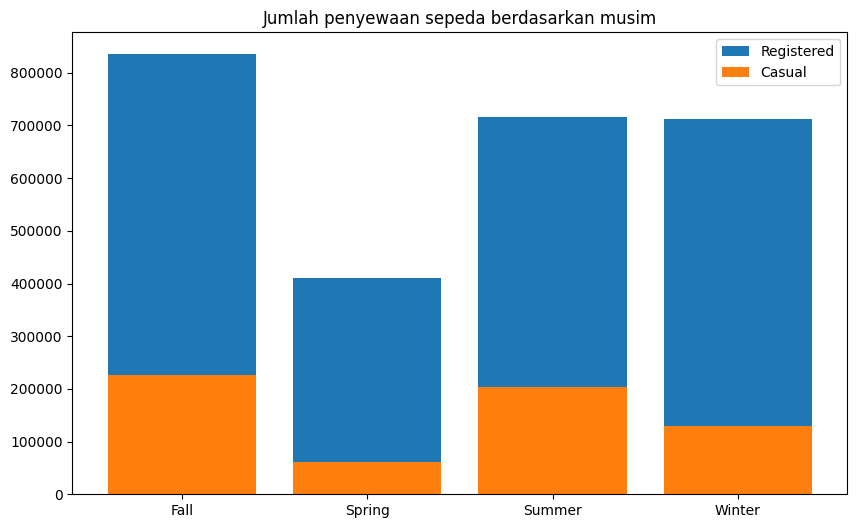

In [33]:
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Hasil analisis dengan menggunakan barplot menunjukkan bahwa musim gugur (Fall) merupakan musim yang paling disukai oleh para pengguna sepeda, baik dari kalangan Casual maupun Registered, diikuti oleh musim panas (Summer), musim dingin (Winter), dan musim semi (Spring).

### Pertanyaan 3: Apakah cuaca memiliki dampak terhadap jumlah pengguna sepeda?

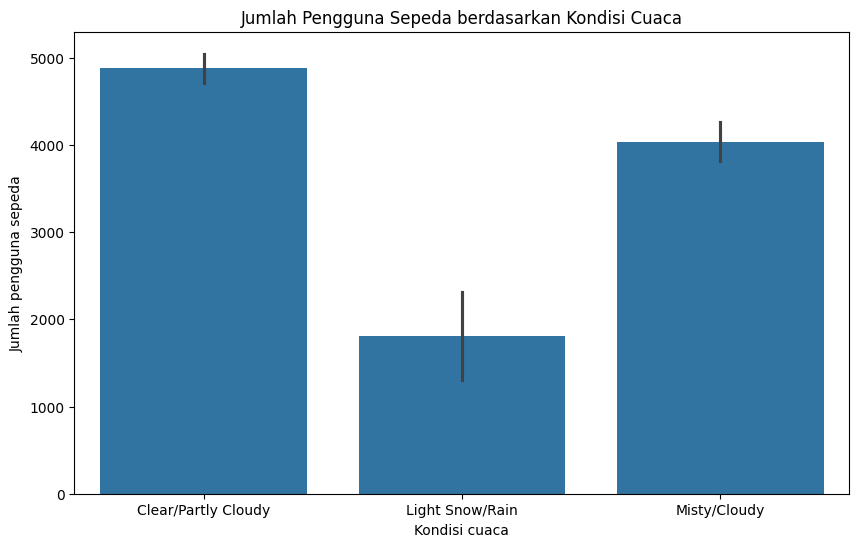

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi cuaca')
plt.ylabel('Jumlah pengguna sepeda')
plt.show()

Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa terdapat korelasi yang jelas antara kondisi cuaca dan jumlah penyewa sepeda. Cuaca yang cerah atau setengah mendung merupakan kondisi yang paling diminati, diikuti oleh cuaca berkabut atau mendung, sedangkan cuaca dengan sedikit salju atau hujan menjadi yang paling tidak diminati.

### Pertanyaan 4: Bagaimana kondisi ketika sepeda digunakan pada workingday, holiday, dan weekday?

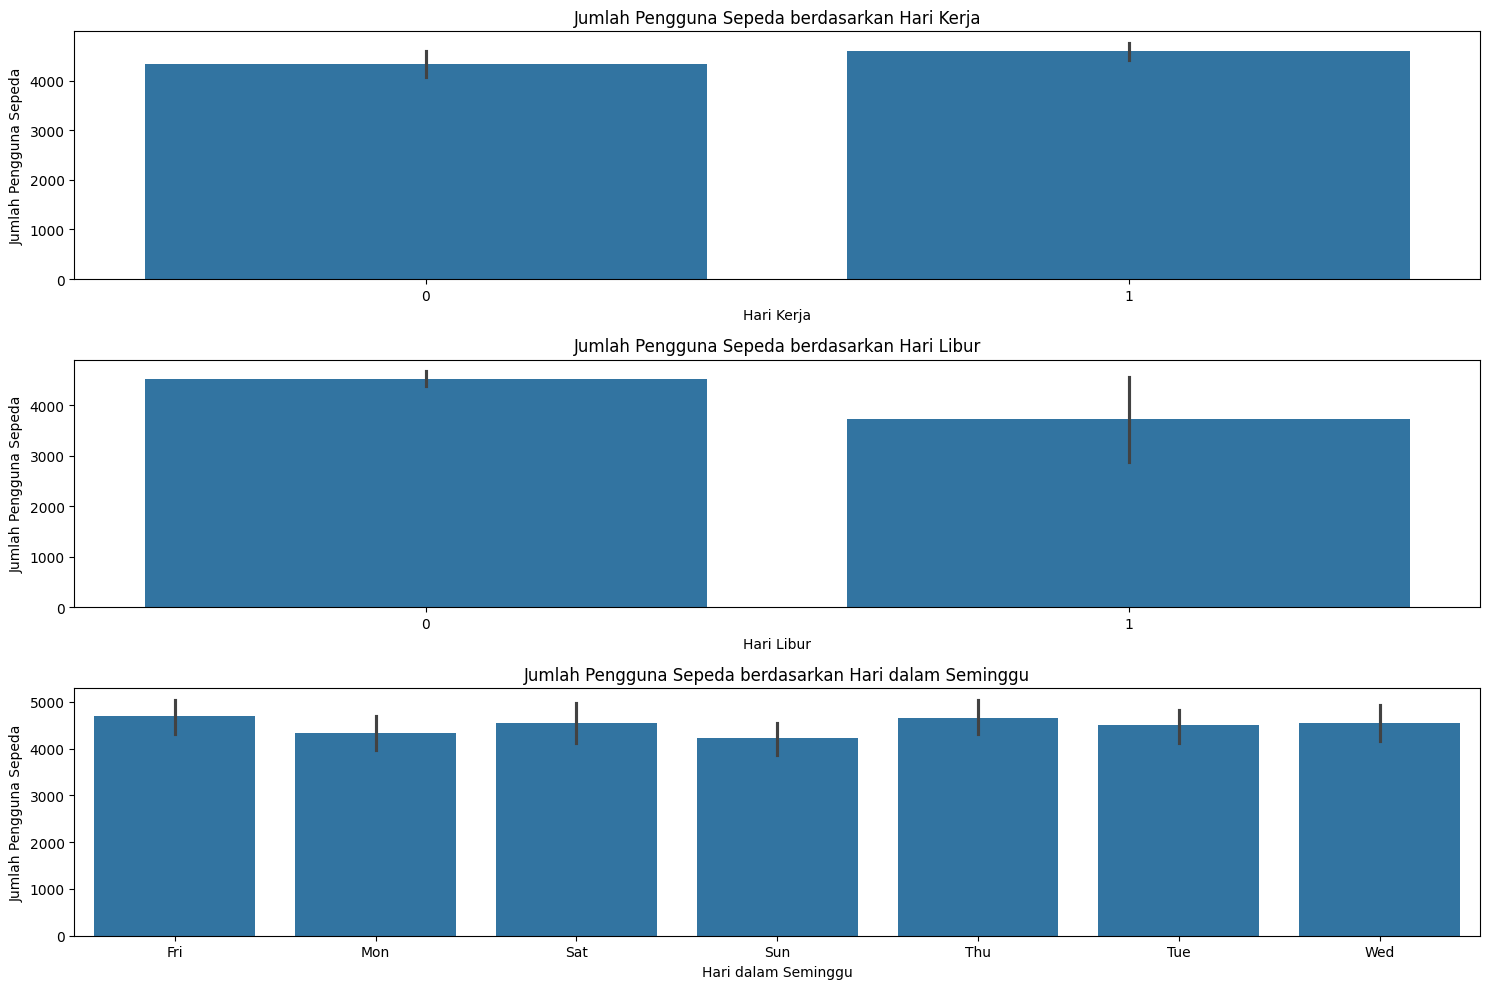

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data menggunakan barplot, dapat disimpulkan hal-hal berikut:

* Jumlah penyewa sepeda lebih tinggi selama hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu dan Minggu), dengan 0 mewakili
akhir pekan dan 1 mewakili hari kerja.
* Jumlah penyewa sepeda jauh lebih besar selama hari biasa (non-hari libur) daripada hari libur (hari nasional).
* Hari Jumat menunjukkan jumlah penyewa sepeda tertinggi, sedangkan Hari Minggu memiliki jumlah penyewa sepeda yang paling sedikit.

### Pertanyaan 5: Bagaimana variabel seperti temp dan atemp serta humidity bisa berpengaruh terhadap jumlah total pengguna sepeda Casual ataupun Registered)

Text(0.5, 1.0, 'Humidity vs Count')

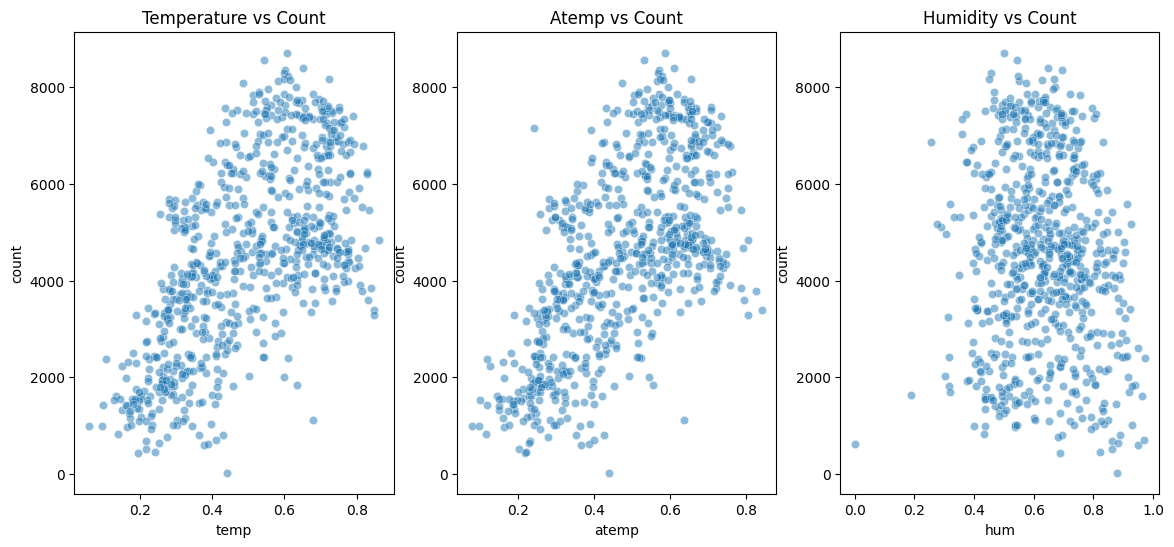

In [36]:
plt.figure(figsize=(14, 6))

# 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Atemp vs Count')

# 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

Berdasarkan analisis menggunakan scatter plot, dapat disimpulkan hal-hal berikut:

* Terdapat hubungan positif antara suhu aktual (temp) dan jumlah total pengguna sepeda.
* Hubungan antara suhu yang dirasakan (atemp) dan jumlah total pengguna sepeda juga menunjukkan korelasi yang positif.
* Meskipun hubungan antara kelembaban udara (hum) dan jumlah total pengguna sepeda cenderung sedikit negatif, namun tidak terlalu signifikan karena kecenderungan data yang tidak terlalu jelas ke arah kiri.
  
Dengan demikian, dapat disimpulkan bahwa kenaikan suhu (baik temp maupun atemp) cenderung diikuti dengan peningkatan jumlah pengguna sepeda. Pengaruh kelembaban udara (hum) terhadap jumlah pengguna sepeda tampaknya relatif kecil, meskipun cenderung dapat mengurangi jumlah pengguna sepeda.

## Conclusion

- Conclution pertanyaan 1: Kesimpulan dari analisis ini adalah bahwa terdapat perbedaan dalam pola penggunaan sepeda antara tahun 2011 dan 2012. Puncak penggunaan sepeda pada tahun 2011 terjadi pada bulan Juni, sementara pada tahun 2012 terjadi pada bulan September. Namun, kedua tahun memiliki dasar penggunaan sepeda yang sama pada bulan Januari. Secara keseluruhan, jumlah total sepeda yang disewakan pada tahun 2012 jauh lebih tinggi daripada tahun 2011.
  
- Conclution pertanyaan 2: Kesimpulan dari visualisasi menunjukkan hasil yang cukup mengejutkan dimana musim semi (Spring) tidak berada pada posisi terakhir seperti yang diperkirakan, melainkan musim dingin (Winter) yang berada di posisi terakhir. Kemungkinan ini dipengaruhi oleh beberapa faktor seperti kondisi cuaca, suhu udara, hari kerja, hari libur, dan faktor lainnya. Sementara itu, musim gugur (Fall) menduduki peringkat pertama dengan jumlah penyewaan sepeda lebih dari 800.000.

- Conclution pertanyaan 3: Kesimpulan dari analisis ini menunjukkan adanya hubungan yang jelas antara kondisi cuaca dan jumlah penyewaan sepeda. Terlihat bahwa para penyewa sepeda cenderung menyukai cuaca yang cerah atau sedikit mendung, dengan nilai kuartil ketiga (Q3) di atas 6000, kuartil pertama (Q1) di bawah 4000, dan median hampir mencapai 5000. Kedua, cuaca berkabut atau mendung menduduki posisi kedua, dengan Q3 di atas 5000, Q1 di bawah 3000, dan median di atas 4000. Terakhir, cuaca saat sedikit bersalju atau hujan memiliki jumlah penyewaan yang lebih rendah, dengan Q3 di atas 2000, Q1 di bawah 1000, dan median di atas 1000. Tidak ada data yang tersedia untuk cuaca saat badai besar, karena tentunya tidak mungkin untuk bersepeda dalam kondisi cuaca ekstrem seperti itu.

- Conclution pertanyaan 4: Kesimpulan dari analisis ini menunjukkan tiga aspek yang dapat diamati dari visualisasi. Pertama, jumlah pengguna sepeda berdasarkan hari kerja (workingday) lebih tinggi daripada jumlah pengguna sepeda pada hari libur (non-workingday), meskipun perbedaannya tidak terlalu signifikan, namun tetap ada perbedaan yang jelas dengan keduanya memiliki jumlah pengguna di atas 4000. Kedua, berdasarkan hari libur (holiday), jumlah pengguna sepeda pada hari biasa (non-holiday) lebih tinggi secara signifikan daripada pada hari libur (holiday). Hal ini menunjukkan kemungkinan bahwa pengguna lebih memilih untuk menyewa sepeda saat hari-hari biasa. Terakhir, berdasarkan hari dalam seminggu (weekday), Jumat (Fri) menempati posisi pertama dengan rata-rata 4690.288462, sedangkan Minggu (Sun) menempati posisi terakhir dengan rata-rata 4228.828571.

- Dari ketiga visualisasi yang telah dipresentasikan, dapat ditarik kesimpulan bahwa suhu aktual (temp) dan suhu yang dirasakan (atemp) memiliki korelasi positif yang kuat dengan jumlah total penyewaan sepeda (count). Ini berarti ketika suhu meningkat, baik temp maupun atemp, jumlah pengguna sepeda cenderung meningkat juga. Sebaliknya, kelembaban udara (humidity) memiliki korelasi negatif yang sangat minimal dengan jumlah penyewaan sepeda (count), meskipun tidak signifikan. Namun demikian, peningkatan kelembaban udara tetap dapat sedikit mengurangi jumlah pengguna sepeda.